<a href="https://colab.research.google.com/github/anastasiabf/Data-Science-Machine-Learning-Projects/blob/main/Netflix_Binge_Watching_Recommendation_%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Description of Each Column**

**1. show_id :** unique ID for every movie / TV Show

**2. type :** Identifier either a movie or TV Show

**3. title :** Title of the Movie / TV Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the Movie / Show

**6. country :** Country where the Mmovie / Show was produced

**7. date_added :** Date it was added on Netflix (format in Month, Date, Year)

**8. release_year :** Actual release year of the Movie / Show

**9. rating :** Rating of the Movie / Show (e.g. TV-MA or TV-14)

**10. duration :** total duration (in minutes or number of the seasons)

**11. listed_in :** genre or category of the content (e.g., documentaries, crime TV Shows)

**12. description :** synopsis of the Movie or TV Shows

# Questions/Problems

1. When does Netflix produce the most content?
2. What are the most popular types of content?
3. Which genres are the most popular?
4. Who is the most cast actor on Netflix?
5. Is there any specific genre that the most cast actor played in?
6. What country is the most producing in netflix?
7. Which movies or TV shows do viewers of "Insidious" likely watch as well?
8. What type of machine learning models yield the best results for predicting between a TV show or a movie?


# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Wrangling

Read the dataset and show the first 5 rows.

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Dummy Project/FILE/netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Check if the value on the specific column is null.

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

'director', 'cast', 'country', 'date_added', 'rating', and 'duration' column contain null value, here we fill the null value with 'unknown'

In [6]:
columns_to_fill = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
for column in columns_to_fill:
    df[column].fillna("Unknown", inplace=True)

In [7]:
df.count()

show_id         8807
type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8807
release_year    8807
rating          8807
duration        8807
listed_in       8807
description     8807
dtype: int64

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Exploratory Data Analysis

Here, we want to explore more about the dataset to gain some insights.

**Netflix Content Release Year Distribution**

In [9]:
fig = px.histogram(df, x='release_year', title='Distribution of Release Year', color='release_year')
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

**Inisghts**



*   The content released by Netflix, whether TV shows or movies, has experienced an increase each year, reaching its peak in 2018 when Netflix released a total of 1147 content.

*   However, after 2018, the number of released content has decreased, possibly due to incomplete datasets.



**Distribution of Content Type in Netflix**

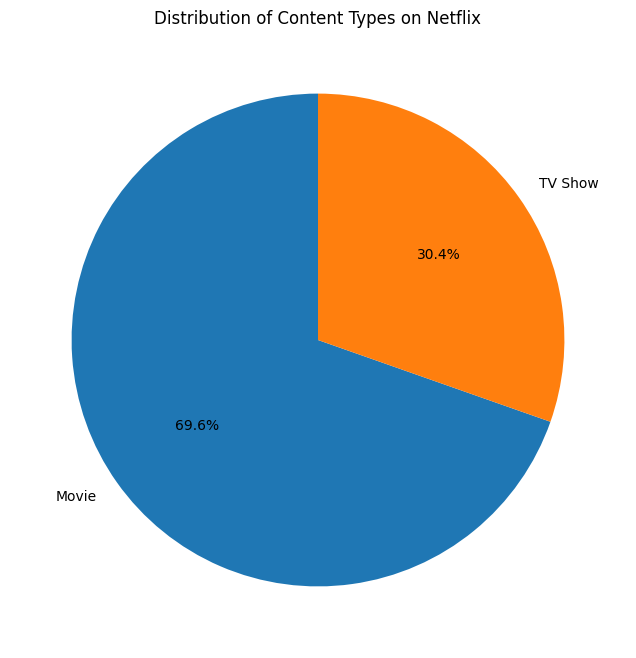

In [10]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,8))
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')  # To remove the default 'type' label
plt.show()

**Insights**


*   The majority of Netflix's released content consists of movies, accounting for 69.6%, while the remaining 30.4% is comprised of TV shows.



**Rating Count in Netflix**

In [11]:
fig = px.histogram(df, x='rating', title='Rating Count in Netflix', color='rating', text_auto=True)
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

**Insights**


*   The most common rating on Netflix is TV-MA, indicating that Netflix offers a lot of content suitable for individuals aged 17 and above (Mature Audiences).
*   It is followed by TV-14, which is suitable for children aged 14 and above. Next is TV-PG, requiring parental guidance.
*   Subsequently, there are ratings like R for adults only and PG-13 for children aged 13 and above with parental guidance.
*   In conclusion, it can be inferred that most TV shows and movies on Netflix are intended for adults and teenagers with parental supervision. Children under 13 are advised not to be exposed to Netflix content.





**Top 5 Most Productive Countries**

In [12]:
filtered_df = df[df['country'] != 'Unknown']

country_counts = filtered_df['country'].value_counts()
top_5_country = country_counts.head(5)

# Create a DataFrame for top 5 country
data_for_plotly = pd.DataFrame({'Country': top_5_country.index, 'Count': top_5_country.values})
fig = px.bar(data_for_plotly, y='Country', x='Count', title='Top 5 Most Productive Countries on Netflix', color='Country', text_auto=True)

# Show the plot
fig.show()

**Insights**

*   
The country with the highest production of content is the United States, with a total of 2818 TV shows or movies.
*   This can be attributed to the extensive film industry in the United States, resulting in a large number of TV shows or movies being produced.




**Top 5 Popular Genres in Netflix**

In [13]:
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)

# Create a DataFrame for top 5 genres
data_for_plotly = pd.DataFrame({'Genre': top_5_genres.index, 'Count': top_5_genres.values})
fig = px.bar(data_for_plotly, y='Genre', x='Count', title='Top 5 Genres Distribution', color='Genre', text_auto=True)

# Show the plot
fig.show()

**Insights**


*   Netflix content is dominated by the international movies genre, totaling 2752 content. This indicates a substantial presence of movies produced in various countries being featured on the platform.



**Top 5 Most Popular Casts**

In [ ]:
# filter dataframe from unknown cast
filtered_df = df[df['cast'] != 'Unknown']

cast_counts = filtered_df['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)

# Create a DataFrame for top 5 casts
data_cast = pd.DataFrame({'Cast': top_5_cast.index, 'Count': top_5_cast.values})
fig = px.bar(data_cast, y='Cast', x='Count', title='Top 5 Most Popular Cast', color='Cast', text_auto=True)

# Show the plot
fig.show()

**Insights**


*   Anupam Kher is an actor from India who holds the record for the highest number of appearances in Netflix TV shows and movies, with a total of 43 titles to his name.



We want to know, what are the genres does Anupam Kher casted in

In [ ]:
data_for_cast = df[df['cast'].str.contains('Anupam Kher', na=False)]

genre_counts_for_cast = data_for_cast['listed_in'].str.split(', ').explode().value_counts()
top_5_genres_for_cast = genre_counts_for_cast.head(5)

data_genre_for_cast = pd.DataFrame({'Genre': top_5_genres_for_cast.index, 'Count': top_5_genres_for_cast.values})
fig = px.bar(data_genre_for_cast, y='Genre', x='Count', title=f'Top 5 Genres for Anupam Kher', color='Genre', text_auto=True)

# Show the plot
fig.show()

**Insights**


*   Anupam Kher has been featured in a diverse range of genres on Netflix. He has appeared in 38 titles in the international movies genre and 28 titles in the drama genre. Additionally, he has been involved in genres such as comedy, action and adventure, and romantic movies.
*   It's worth noting that a single TV show or movie may incorporate two or more of these genres.




**Distribution of Each Netflix Contents Over Year**

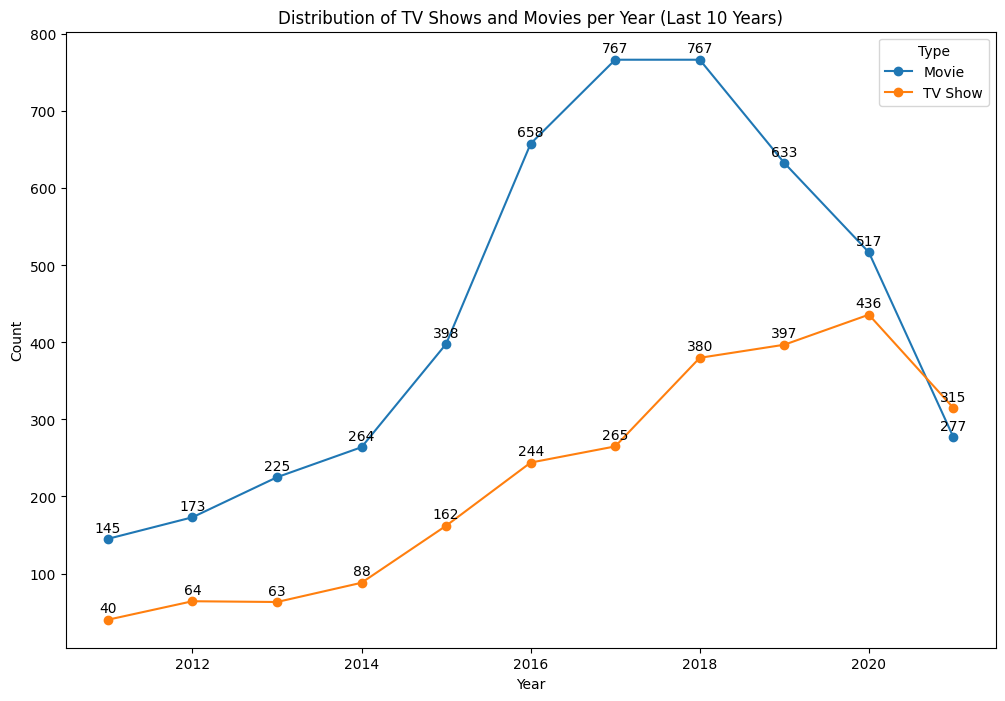

In [ ]:
# Filter the DataFrame for the last 10 years
last_10_years_df = df[df['release_year'] >= (df['release_year'].max() - 10)]

# Group by 'release_year' and 'type' and count the occurrences
type_counts_per_year = last_10_years_df.groupby(['release_year', 'type']).size().unstack()

# Plotting the counts as a line series
ax = type_counts_per_year.plot(kind='line', marker='o', figsize=(12, 8))

# Adding labels and title
plt.title('Distribution of TV Shows and Movies per Year (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')

# Adding annotations (numbers) at each data point
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

# Show the plot
plt.show()

**Insights**


*   Over the past 10 years, starting from 2021, Netflix has consistently produced more movies than TV shows since 2011.
*   The most significant difference between movies and TV shows occurred in 2017, with 767 movies produced compared to only 265 TV shows, resulting in a difference of 502.
*   The trend of producing more movies than TV shows experienced a decline in 2018.
*   However, in 2021, there was a shift in the trend, with Netflix producing more TV shows (315) than movies (277).






**Trends in Genre Popularity Over Year**

In [ ]:
# Splitting genres that are still in string format.
df_split_genre = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Filter the DataFrame for the last 21 years
last_21_years_df = df_split_genre[df_split_genre['release_year'] >= (df_split_genre['release_year'].max() - 20)]

# Calculating the number of movies/series added to the streaming platform each year based on the separated genres.
genre_counts_per_year = last_21_years_df.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

fig = px.line(
    genre_counts_per_year,
    x='release_year',
    y='count',
    color='listed_in',
    title='Trends in Genre Popularity Over Time (Last 21 Years)',
    labels={'count': 'Number of Titles', 'release_year': 'Release Year'},
    line_shape='linear',
)

fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Titles',
    legend_title='Genre',
    hovermode='closest',
)

fig.show()

**Insights**


*   International movies genre has emerged as the most popular genre on Netflix and has experienced a significant increase.
*   Genre international movies has emerged as the most popular genre on Netflix and has experienced a significant increase.



# Title Recommendations Based on The Genres (NLP)

Recommendation systems are crucial on various platforms, including Netflix, which is one of the largest TV show and movie streaming platforms. To implement a recommendation system based on genres for users, one of the Natural Language Processing (NLP) algorithms used is cosine similarity.


---


Cosine similarity is a comparison method used to measure the similarity between two vectors. In the context of Netflix recommendations, vectors can represent user preferences or genre characteristics and attributes of titles on the platform.


---


By using cosine similarity, the system can calculate how similar the vector representation of a user's genre preferences is to the vectors representing the genres of titles on Netflix. Titles with high similarity to a user's genre preferences will be recommended.


---


This is a commonly used approach in recommendation systems because it allows understanding how closely two vectors (in this case, user genre preferences and title genres) approximate similarity in feature space. Thus, users can receive recommendations more aligned with their preferences.






In [ ]:
# Converting the 'title' data series into a list
netflix_title = df['title'].tolist()

# Converting the 'genre' data series into a list
netflix_genre = df['listed_in'].tolist()

# Printing the lengths of the converted lists
print(len(netflix_title))
print(len(netflix_genre))

5332
5332


In [ ]:
# Creating a dictionary for the data 'title' and 'genre'
df_new = pd.DataFrame({
    'title': netflix_title,
    'genre' : netflix_genre
})
df_new

,title,genre
0,Sankofa,"Dramas, Independent Movies, International Movies"
1,The Great British Baking Show,"British TV Shows, Reality TV"
2,The Starling,"Comedies, Dramas"
3,Je Suis Karl,"Dramas, International Movies"
4,Jeans,"Comedies, International Movies, Romantic Movies"
...,...,...
5327,Zinzana,"Dramas, International Movies, Thrillers"
5328,Zodiac,"Cult Movies, Dramas, Thrillers"
5329,Zombieland,"Comedies, Horror Movies"
5330,Zoom,"Children & Family Movies, Comedies"


In [ ]:
# Initialize TfidfVectorizer
tf = TfidfVectorizer()

# Calculate idf on the 'genre' data
tf.fit(df_new['genre'])

# Retrieve the feature names
feature_names = tf.get_feature_names_out()

# Print the feature names
print(feature_names)

['action' 'adventure' 'anime' 'british' 'children' 'classic' 'comedies'
 'comedy' 'crime' 'cult' 'documentaries' 'docuseries' 'dramas' 'faith'
 'family' 'fantasy' 'features' 'fi' 'horror' 'independent' 'international'
 'kids' 'korean' 'language' 'lgbtq' 'movies' 'music' 'musicals'
 'mysteries' 'nature' 'reality' 'romantic' 'sci' 'science' 'series'
 'shows' 'spanish' 'spirituality' 'sports' 'stand' 'talk' 'teen'
 'thrillers' 'tv' 'up']


In [ ]:
# Fit and transform the data into a TF-IDF matrix
tfidf_matrix = tf.fit_transform(df_new['genre'])

# Check the size of the TF-IDF matrix
print(tfidf_matrix.shape)

(5332, 45)


In [ ]:
# Convert the TF-IDF vectorized matrix into dense matrix format
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.62655199,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Create a DataFrame to visualize the tf-idf matrix
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_new['title']
)

In [ ]:
# calculate cosine similarity on matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.24512115, ..., 0.16248587, 0.13658052,
        0.33912223],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24512115, 0.        , 1.        , ..., 0.37635857, 0.31635521,
        0.18609405],
       ...,
       [0.16248587, 0.        , 0.37635857, ..., 1.        , 0.27057992,
        0.061679  ],
       [0.13658052, 0.        , 0.31635521, ..., 0.27057992, 1.        ,
        0.05184543],
       [0.33912223, 0.        , 0.18609405, ..., 0.061679  , 0.05184543,
        1.        ]])

In [ ]:
# Create a DataFrame from the cosine_sim variable with titles as rows and columns
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_new['title'], columns=df_new['title'])
print('Shape:', cosine_sim_df.shape)

# Display a sample of the similarity matrix for each title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5332, 5332)


title,Trip to Bhangarh: Asia's Most Haunted Place,Insidious,Puppy Star Christmas,The Mayo Clinic,Gie
title,,,,,
Catch Me If You Can,0.000000,0.000000,0.000000,0.000000,0.635627
Mudbound,0.118355,0.090885,0.086451,0.000000,0.473550
"El Especial de Alex Fernández, el Especial",0.000000,0.000000,0.000000,0.000000,0.000000
Mara,0.612673,1.000000,0.062698,0.000000,0.118268
Between Maybes,0.346186,0.139604,0.132792,0.000000,0.715442
The Mask of Zorro,0.082842,0.063615,0.060511,0.000000,0.114143
Merry Men: The Real Yoruba Demons,0.396006,0.108278,0.392785,0.000000,0.545633
Other People,0.101766,0.078146,0.283481,0.000000,0.407176
The Peacemaker,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def title_recommendations(title, similarity_data=cosine_sim_df, items=df_new[['title', 'genre']], k=8):
    """
    Title Recommendations based on similarity dataframe

    Parameters:
    ---
    title : str
                Title of Movie or TV Show (index of the similarity dataframe)
    similarity_data : pd.DataFrame (object)
                      Symmetric similarity dataframe with tit;e as both index and columns
    items : pd.DataFrame (object)
            Contains both names and other features used to define similarity
    k : int
        Number of recommendations to provide
    ---

    In this function, we take k with the highest similarity values
    on the given index (i).
    """

    # Retrieve data using argpartition to perform an indirect partition along the given axis
    # Convert the dataframe to numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Retrieve data with the highest similarity from the available index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title so that the searched title name doesn't appear in the recommendation list
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Here, one of Netflix's viewers has finished watching the movie "Insidious," so we are providing some recommendations for him or her similar to the movie "Insidious."

In [ ]:
rec_title = title_recommendations("Insidious")
print(rec_title)

               title                     genre
0          The Craft  Horror Movies, Thrillers
1       The Darkness  Horror Movies, Thrillers
2      Gerald's Game  Horror Movies, Thrillers
3  What Lies Beneath  Horror Movies, Thrillers
4      Before I Wake  Horror Movies, Thrillers
5             Emelie  Horror Movies, Thrillers
6        The Silence  Horror Movies, Thrillers
7        Cabin Fever  Horror Movies, Thrillers


# Feature Engineering

We want to make a prediction wether a content include in TV Show or Movie, so we encoded the categorical features using label encoder

In [10]:
str_col = df.select_dtypes(include=('object')).columns
le = LabelEncoder()
for col in str_col:
    df[col] = le.fit_transform(df[col].astype('str'))

In [11]:
df = df.drop(['show_id'], axis=1)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,1,3861,4303,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...
8802,0,8770,979,4677,603,1419,2007,8,70,269,895
8803,1,8773,4303,7246,736,788,2018,14,110,424,8483
8804,0,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,0,8777,3247,7061,603,665,2006,6,206,125,3315


# Predictive Modeling (Machine Learning)

**Support Vector Machine**

In [18]:
# split features and target
X = df.iloc[:, 1:11]
y = df.iloc[:, 0]

# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizialize and train the model support vector machine
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [26]:
# make a prediction on test data
pred_svm = model_svm.predict(X_test)

# evaluate the model on test data
test_accuracy_svm = accuracy_score(y_test, pred_svm)
test_precision_svm = precision_score(y_test, pred_svm, average='weighted')
test_recall_svm = recall_score(y_test, pred_svm, average='weighted')
test_f1_svm = f1_score(y_test, pred_svm, average='weighted')

print("Test Accuracy:", test_accuracy_svm)
print("Test Precision:", test_precision_svm)
print("Test Recall:", test_recall_svm)
print("Test F1-Score:", test_f1_svm)

confusion_mat = confusion_matrix(y_test, pred_svm)
print(confusion_mat)

specificity_svm = []
for i in range(confusion_mat.shape[0]):
    tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
    fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

    denominator = tn + fp
    if denominator != 0:
        specificity_i = tn / denominator  # specificity for class i
    else:
        specificity_i = 0  # avoid division by zero

    specificity_svm.append(specificity_i)
print("Test Specificity:", np.mean(specificity_svm))

Test Accuracy: 0.8694665153234961
Test Precision: 0.8878830321569864
Test Recall: 0.8694665153234961
Test F1-Score: 0.8728984948829304
[[1028  186]
 [  44  504]]
Test Specificity: 0.8832477543019998


**Random Forest**

In [20]:
# Inizialize and train the model random forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# make a prediction on test data
pred_rf = model_rf.predict(X_test)

# evaluate the model on test data
test_accuracy_rf = accuracy_score(y_test, pred_rf)
test_precision_rf = precision_score(y_test, pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, pred_rf, average='weighted')

print("Test Accuracy:", test_accuracy_rf)
print("Test Precision:", test_precision_rf)
print("Test Recall:", test_recall_rf)
print("Test F1-Score:", test_f1_rf)

confusion_mat = confusion_matrix(y_test, pred_rf)
print(confusion_mat)

specificity_rf = []
for i in range(confusion_mat.shape[0]):
    tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
    fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

    denominator = tn + fp
    if denominator != 0:
        specificity_i = tn / denominator  # specificity for class i
    else:
        specificity_i = 0  # avoid division by zero

    specificity_rf.append(specificity_i)
print("Test Specificity:", np.mean(specificity_rf))

Test Accuracy: 0.9880817253121453
Test Precision: 0.9880701802328944
Test Recall: 0.9880817253121453
Test F1-Score: 0.9880666613555501
[[1206    8]
 [  13  535]]
Test Specificity: 0.9848437932154066


**Logistic Regression**

In [23]:
# Inizialize and train the model logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# make a prediction on test data
pred_lr = model_lr.predict(X_test)

# evaluate the model on test data
test_accuracy_lr = accuracy_score(y_test, pred_lr)
test_precision_lr = precision_score(y_test, pred_lr, average='weighted')
test_recall_lr = recall_score(y_test, pred_lr, average='weighted')
test_f1_lr = f1_score(y_test, pred_lr, average='weighted')

print("Test Accuracy:", test_accuracy_lr)
print("Test Precision:", test_precision_lr)
print("Test Recall:", test_recall_lr)
print("Test F1-Score:", test_f1_lr)

confusion_mat = confusion_matrix(y_test, pred_lr)
print(confusion_mat)

specificity_lr = []
for i in range(confusion_mat.shape[0]):
    tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
    fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

    denominator = tn + fp
    if denominator != 0:
        specificity_i = tn / denominator  # specificity for class i
    else:
        specificity_i = 0  # avoid division by zero

    specificity_lr.append(specificity_i)
print("Test Specificity:", np.mean(specificity_lr))

Test Accuracy: 0.8836549375709422
Test Precision: 0.8828995510536166
Test Recall: 0.8836549375709422
Test F1-Score: 0.8832049120254284
[[1119   95]
 [ 110  438]]
Test Specificity: 0.8605081831190851


**Model Comparison**

In [31]:
# Create a DataFrame
metrics_dict = {
    'Metric': ['Accuracy', 'Precision', 'Sensitivity', 'Specificity'],
    'Support Vector Machine': [test_accuracy_svm, test_precision_svm, test_recall_svm, np.mean(specificity_svm)],
    'Random Forest': [test_accuracy_rf, test_precision_rf, test_recall_rf, np.mean(specificity_rf)],
    'Logistic Regression': [test_accuracy_lr, test_precision_lr, test_recall_lr, np.mean(specificity_lr)]
}

metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print(metrics_df)

        Metric  Support Vector Machine  Random Forest  Logistic Regression
0     Accuracy                0.869467       0.988082             0.883655
1    Precision                0.887883       0.988070             0.882900
2  Sensitivity                0.869467       0.988082             0.883655
3  Specificity                0.883248       0.984844             0.860508


**Insights**


*   From 3 machine learning models, Random Forest has best result in all evaluation metrics.



# Conclusion



*   In 2018, Netflix experienced its highest production year, with a total of 1,147 TV shows and movies.
*   The predominant content type on Netflix is movies, constituting 69.6% of the platform's offerings.
*   The international movies genre stands out as the most popular among others, encompassing a total of 2,752 pieces of content, including TV shows and movies.
*   Anupam Kher holds the record as the most featured actor on Netflix, appearing in a total of 43 TV shows and movies.
*   Anupam Kher's most frequently portrayed genre is international movies.
*   The United States leads in content production on Netflix, contributing a total of 2,818 TV shows and movies.
*   Viewers who enjoyed the movie "Insidious" are likely to appreciate recommendations such as "The Craft," "The Darkness," "Gerald's Game," "What Lies Beneath," "Before I Wake," "Emelie," "The Silence," and "Cabin Fever."
*   The Random Forest model emerges as the optimal machine learning model for predicting whether a content falls into the category of TV shows or movies, boasting an accuracy, sensitivity, specificity, and precision of 98.81%, 98.81%, 98.48%, and 98.81%, respectively.







